In [99]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
df=pd.read_csv('/home/benson/Downloads/taxi_trial.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-12-01 00:00:00,2015-12-01 00:05:16,5,0.96,-73.979942,40.765381,1,N,-73.966309,40.763088,1,5.5,0.5,0.5,1.00,0.0,0.3,7.80
1,2,2015-12-01 00:00:00,2015-12-01 00:00:00,2,2.69,-73.972336,40.762379,1,N,-73.993629,40.745998,1,21.5,0.0,0.5,3.34,0.0,0.3,25.64
2,2,2015-12-01 00:00:00,2015-12-01 00:00:00,1,2.62,-73.968849,40.764530,1,N,-73.974548,40.791641,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36
3,1,2015-12-01 00:00:01,2015-12-01 00:05:56,1,1.20,-73.993935,40.741684,1,N,-73.997665,40.747467,1,6.5,0.5,0.5,0.20,0.0,0.3,8.00
4,1,2015-12-01 00:00:01,2015-12-01 00:09:28,2,3.00,-73.988922,40.726990,1,N,-73.975594,40.696869,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30


1. Pickup Longitude
2. Pickup Latitude
3. Dropoff Longitude
4. Dropoff Latitude

1. Timediff- will dictate when loops occur
2. Trip distance-already kinda implicit
3. Payment-thickness of loops

In [101]:
df.drop(['VendorID','passenger_count','RatecodeID','store_and_fwd_flag','payment_type',
         'fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'],axis=1,inplace=True)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount
0,2015-12-01 00:00:00,2015-12-01 00:05:16,0.96,-73.979942,40.765381,-73.966309,40.763088,7.80
1,2015-12-01 00:00:00,2015-12-01 00:00:00,2.69,-73.972336,40.762379,-73.993629,40.745998,25.64
2,2015-12-01 00:00:00,2015-12-01 00:00:00,2.62,-73.968849,40.764530,-73.974548,40.791641,21.36
3,2015-12-01 00:00:01,2015-12-01 00:05:56,1.20,-73.993935,40.741684,-73.997665,40.747467,8.00
4,2015-12-01 00:00:01,2015-12-01 00:09:28,3.00,-73.988922,40.726990,-73.975594,40.696869,12.30


In [102]:
def stringToDatetime(string):
    return datetime.datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
def dateToNumber(date):
    return date.seconds
def toMinutes(time):
    return time/60

In [103]:
df['pickup']= df['tpep_pickup_datetime'].apply(stringToDatetime)
df['dropoff']= df['tpep_dropoff_datetime'].apply(stringToDatetime)
df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1,inplace=True)
df['timediff']= df['dropoff']- df['pickup']
df['time']= df['timediff'].apply(dateToNumber)
df.drop(['pickup','dropoff','timediff'],axis=1,inplace=True)
df.head(10)

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,time
0,0.96,-73.979942,40.765381,-73.966309,40.763088,7.80,316
1,2.69,-73.972336,40.762379,-73.993629,40.745998,25.64,0
2,2.62,-73.968849,40.764530,-73.974548,40.791641,21.36,0
3,1.20,-73.993935,40.741684,-73.997665,40.747467,8.00,355
4,3.00,-73.988922,40.726990,-73.975594,40.696869,12.30,567
5,6.30,-73.974083,40.762913,-74.012802,40.702209,26.15,970
6,0.63,-73.968315,40.755329,-73.962082,40.758915,6.36,167
7,1.91,-73.994209,40.746101,-74.004250,40.721809,11.16,484
8,4.50,-74.006760,40.718906,-73.989693,40.772854,21.36,1029
9,1.42,-73.999634,40.734772,-73.989067,40.723122,12.25,639


In [104]:
df=df[df.dropoff_latitude>0]
df= df[df.total_amount>0]
df = df[(df.time>0) & (df.time<20000)]
df.head(20)

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,time
0,0.96,-73.979942,40.765381,-73.966309,40.763088,7.80,316
3,1.20,-73.993935,40.741684,-73.997665,40.747467,8.00,355
4,3.00,-73.988922,40.726990,-73.975594,40.696869,12.30,567
5,6.30,-73.974083,40.762913,-74.012802,40.702209,26.15,970
6,0.63,-73.968315,40.755329,-73.962082,40.758915,6.36,167
7,1.91,-73.994209,40.746101,-74.004250,40.721809,11.16,484
8,4.50,-74.006760,40.718906,-73.989693,40.772854,21.36,1029
9,1.42,-73.999634,40.734772,-73.989067,40.723122,12.25,639
10,2.02,-73.982681,40.731312,-74.006012,40.745232,10.80,633
12,1.00,-73.995766,40.743790,-74.002625,40.730545,9.45,346


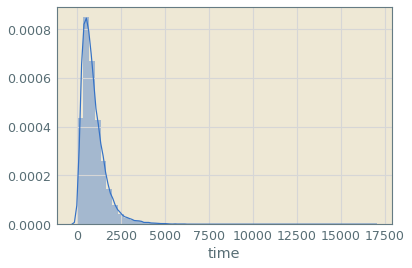

In [105]:
sns.distplot(df.time)

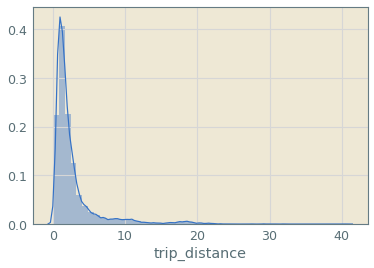

In [106]:
sns.distplot(df.trip_distance)

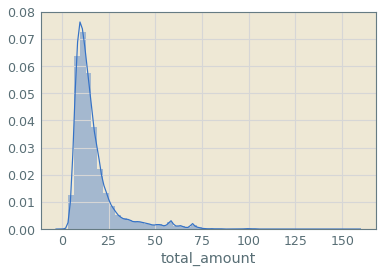

In [107]:
sns.distplot(df.total_amount)

In [108]:
df.total_amount= df.total_amount.where(df.total_amount<75,75)
df.time= df.time.where(df.time<5280,5280)
df['time']= df['time'].apply(toMinutes)
df.head()

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,time
0,0.96,-73.979942,40.765381,-73.966309,40.763088,7.80,5.266667
3,1.20,-73.993935,40.741684,-73.997665,40.747467,8.00,5.916667
4,3.00,-73.988922,40.726990,-73.975594,40.696869,12.30,9.450000
5,6.30,-73.974083,40.762913,-74.012802,40.702209,26.15,16.166667
6,0.63,-73.968315,40.755329,-73.962082,40.758915,6.36,2.783333


In [109]:
df.to_csv('/home/benson/Dropbox/Code/Projects/P5_Projects/Mat259_Final/trial_data.csv',sep=',', index = False)

In [110]:
df['total_amount'].max()

75.0